<a href="https://colab.research.google.com/github/nepslor/teaching/blob/main/TimeSeriesForecasting/WhatCanBeForecasted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What can be forecasted
In this lesson we'll explore different time series through some a-priori analysis, and we will try later to forecast them. In order to guess their forecastability level we will use 
* the autocorrelation function
* entropy and approximate entropy

In [1]:
install.packages("fpp3")
install.packages("gridExtra")
install.packages("tsfeatures")

library("fpp3")
library(gridExtra)
library("tsfeatures")
#library("fma")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ────────────────────────────────────────────── fpp3 0.5 ──

✔ tibble      3.1.8     ✔ tsibble     1.1.3
✔ dplyr       1.1.0     ✔ tsibbledata 0.4.1
✔ tidyr       1.3.0     ✔ feasts      0.3.0
✔ lubridate   1.9.2     ✔ fable       0.3.2
✔ ggplot2     3.4.1     ✔ fabletools  0.3.2

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::set

In [2]:
library("fpp3")
library(gridExtra)
library("tsfeatures")
# utility function to set the plot dimensions 
set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }

set_plot_dimensions(15, 6)

# Autocorrelation function
We recall that the ACF for a given lag $k$ is defined as:
$$\rho_k = \frac{\gamma_k}{\gamma_0}=\frac{cov(x_t, x_{t-k})}{\sigma(x_t)\sigma(x_{t-k})} \stackrel{stationary}{=} \frac{cov(x_t, x_{t-k})}{\sigma^2(x)}$$

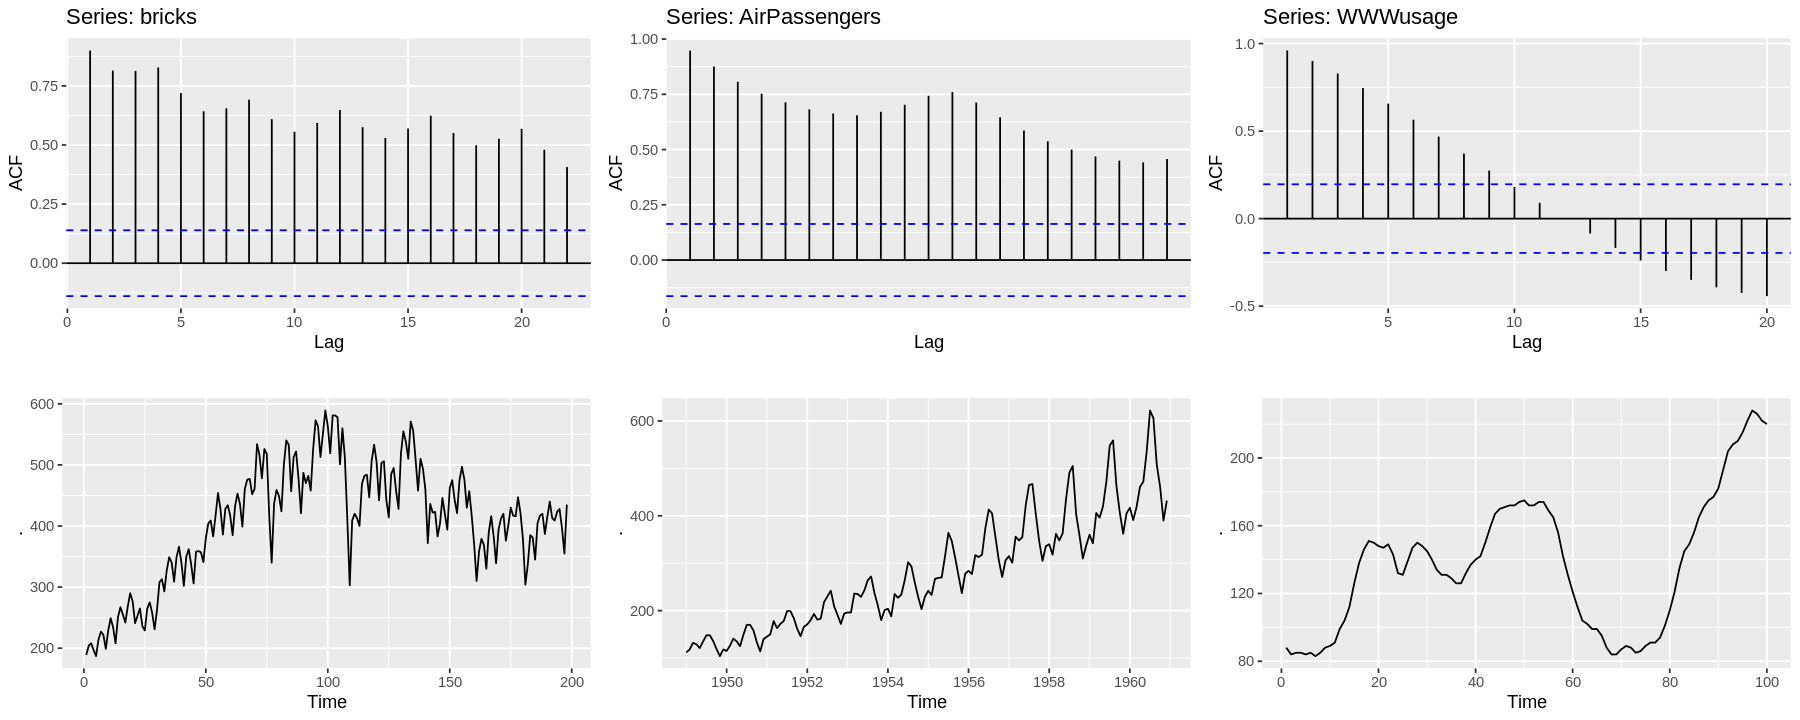

In [16]:
bricks <- aus_production %>% filter(!is.na(Bricks))
bricks <-ts(bricks$Bricks)

plt1 <- acf(bricks, plot=FALSE) %>% autoplot()
plt2 <- acf(AirPassengers, lag_max = 100, plot=FALSE) %>% autoplot()
plt3 <- acf(WWWusage, lag_max = 100, plot=FALSE) %>% autoplot()

plt4 <- bricks %>% autoplot()
plt5 <- AirPassengers %>% autoplot()
plt6 <- WWWusage %>% autoplot()

grid.arrange(plt1, plt2, plt3, plt4, plt5, plt6, ncol=3, nrow=2)

In [11]:
bricks

Quarter,Beer,Tobacco,Bricks,Cement,Electricity,Gas
<qtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1956 Q1,284,5225,189,465,3923,5
1956 Q2,213,5178,204,532,4436,6
1956 Q3,227,5297,208,561,4806,7
1956 Q4,308,5681,197,570,4418,6
1957 Q1,262,5577,187,529,4339,5
1957 Q2,228,5651,214,604,4811,7
1957 Q3,236,5317,227,603,5259,7
1957 Q4,320,6152,222,582,4735,6
1958 Q1,272,5758,199,554,4608,5


Loading required package: quantmod

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following object is masked from ‘package:tsibble’:

    index


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



################################### WARNING ###################################
# We noticed you have dplyr installed. The dplyr lag() function breaks how    #
# base R's lag() function is supposed to work, which breaks lag(my_xts).      #
#                                                                             #
# Calls to lag(my_xts) that you enter or source() into this session won't     #
# work correctly.                                                             #
#                                                                             #
# All package code is unaffected because it is protected by the R namespace   #
# mechanism.                                                                  #

[1] "GOOG"

Plot variable not specified, automatically selected `.vars = value`
Plot variable not specified, automatically selected `.vars = value`


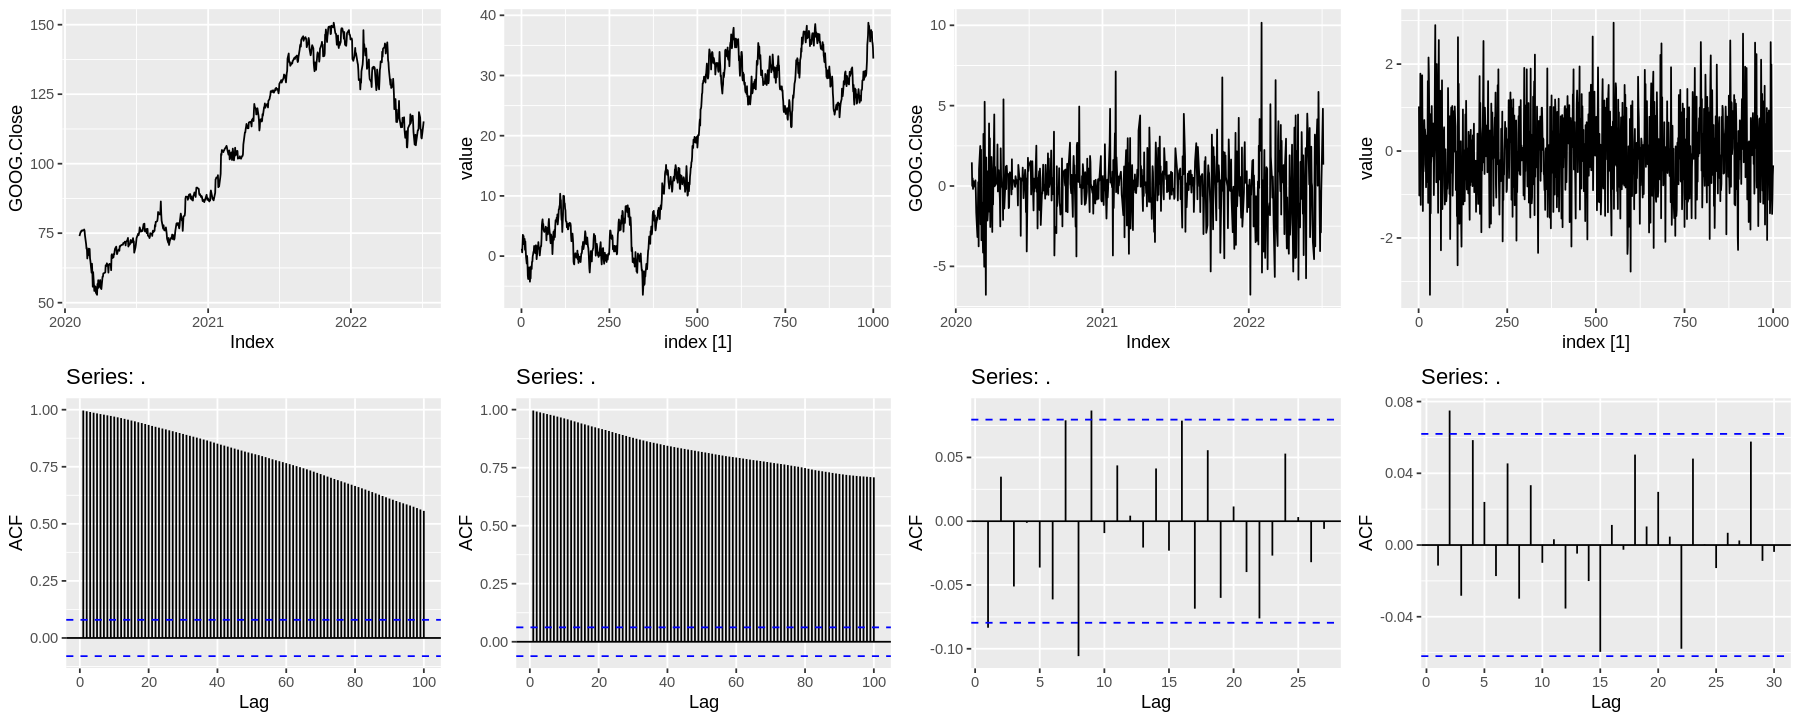

In [17]:
require(quantmod)
install.packages("pracma")
library("pracma")

randseries <- as_tsibble(ts(rnorm(1000)))
randomwalk <- as_tsibble(ts(cumsum(rnorm(1000))))


getSymbols("GOOG", src = "yahoo", 
           from = "2020-02-07", to = "2022-07-07")
stock <- GOOG[,4]


stock_diff <-diff(stock, na.pad = 0)

plt1<-autoplot(stock)
plt2<-autoplot(randomwalk)

plt3<-autoplot(stock_diff)
plt4<-autoplot(randseries)


plt5<-stock%>%acf(100, plot=FALSE)%>%autoplot
plt6<-randomwalk%>%acf(100,plot=FALSE)%>%autoplot
plt7<-stock_diff%>%acf(plot=FALSE)%>%autoplot
plt8<-randseries%>%acf(plot=FALSE)%>%autoplot


grid.arrange(plt1, plt2, plt3, plt4, plt5, plt6, plt7, plt8, ncol=4, nrow=2)

# Time series fueatures and entropy


In [18]:
cat('goog diff entropy:', entropy(stock_diff))
cat('\ngoog diff approx entropy:', approx_entropy(stock_diff))

cat('\nrand entropy:', entropy(ts(rnorm(1000))))
cat('\nrand approx entropy:', approx_entropy(ts(rnorm(1000))))

goog diff entropy: 0.994293
goog diff approx entropy: 1.351187
rand entropy: 1
rand approx entropy: 1.684635

In [19]:
mylist <-list(aus_production$Bricks, WWWusage, AirPassengers, USAccDeaths, sunspot.year, ts(rnorm(500)))

tsf <- tsfeatures(mylist)
ts_entropies <- sapply(mylist, entropy)
ts_app_entropies <- sapply(mylist, approx_entropy)

tsf

frequency,nperiods,seasonal_period,trend,spike,linearity,curvature,e_acf1,e_acf10,entropy,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,seasonal_strength,peak,trough,seas_acf1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,0.864512641,1.525926e-06,6.5240456,-9.2469457,0.38411149,1.10912374,0.4515375,0.89952871,5.33893537,-0.07499373,1.7550083,-0.30225777,1.8250689,NA,NA,NA,NA
1,0,1,0.985270221,3.014112e-08,4.4457010,1.1010266,0.77417927,0.98292710,0.4611257,0.96018011,4.19316717,0.79176355,1.4054711,0.17355472,0.3343374,NA,NA,NA,NA
12,1,12,0.990955037,1.461792e-08,11.0475320,1.0925123,0.50917506,0.93036644,0.2961049,0.94804734,5.67008712,0.30285526,0.4088376,-0.19100587,0.2507803,0.9406725,7,11,0.7603950
12,1,12,0.802457010,9.150729e-07,-2.1245616,2.8535491,0.25759447,0.34059288,0.5477944,0.70747095,1.20449959,0.02330895,0.2747615,-0.48404429,0.7492513,0.9447945,7,2,0.6285892
1,0,1,0.125334368,2.101792e-05,3.5846937,1.1106505,0.79259539,2.21343833,0.7018523,0.81413495,1.83307492,0.52598938,1.4994073,-0.03493716,0.1882907,NA,NA,NA,NA
1,0,1,0.007834924,8.762807e-06,0.8859919,-0.2567168,-0.03838128,0.03609248,0.9968632,-0.02983906,0.03534233,-0.54494242,0.3474837,-0.72050929,0.6515305,NA,NA,NA,NA


Plot variable not specified, automatically selected `.vars = value`
Plot variable not specified, automatically selected `.vars = value`
Plot variable not specified, automatically selected `.vars = value`
Plot variable not specified, automatically selected `.vars = value`
Plot variable not specified, automatically selected `.vars = value`
Plot variable not specified, automatically selected `.vars = value`
Warning message:
“Removed 20 rows containing missing values (`geom_line()`).”


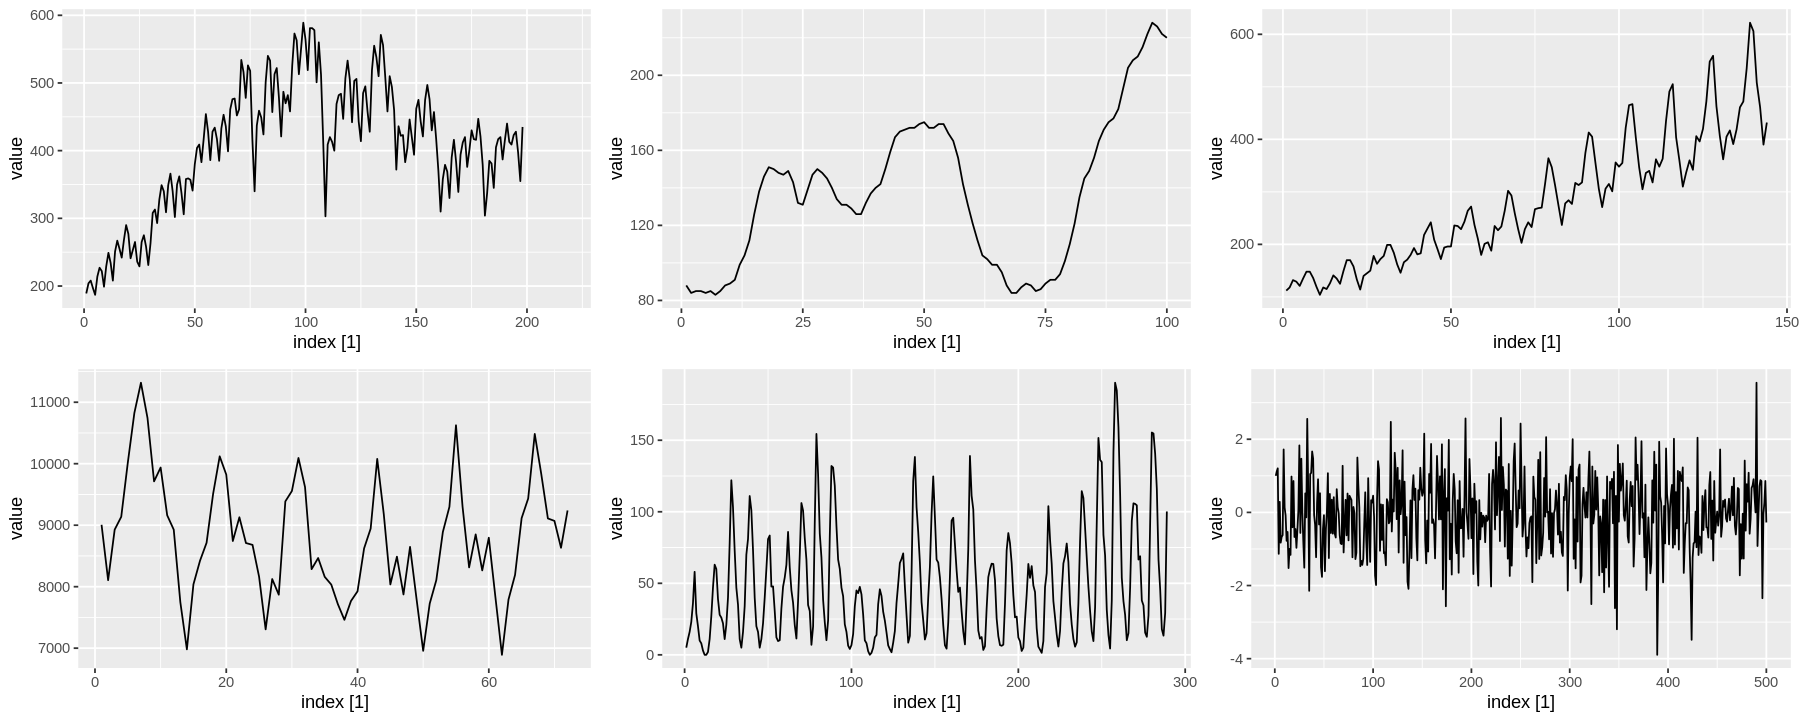

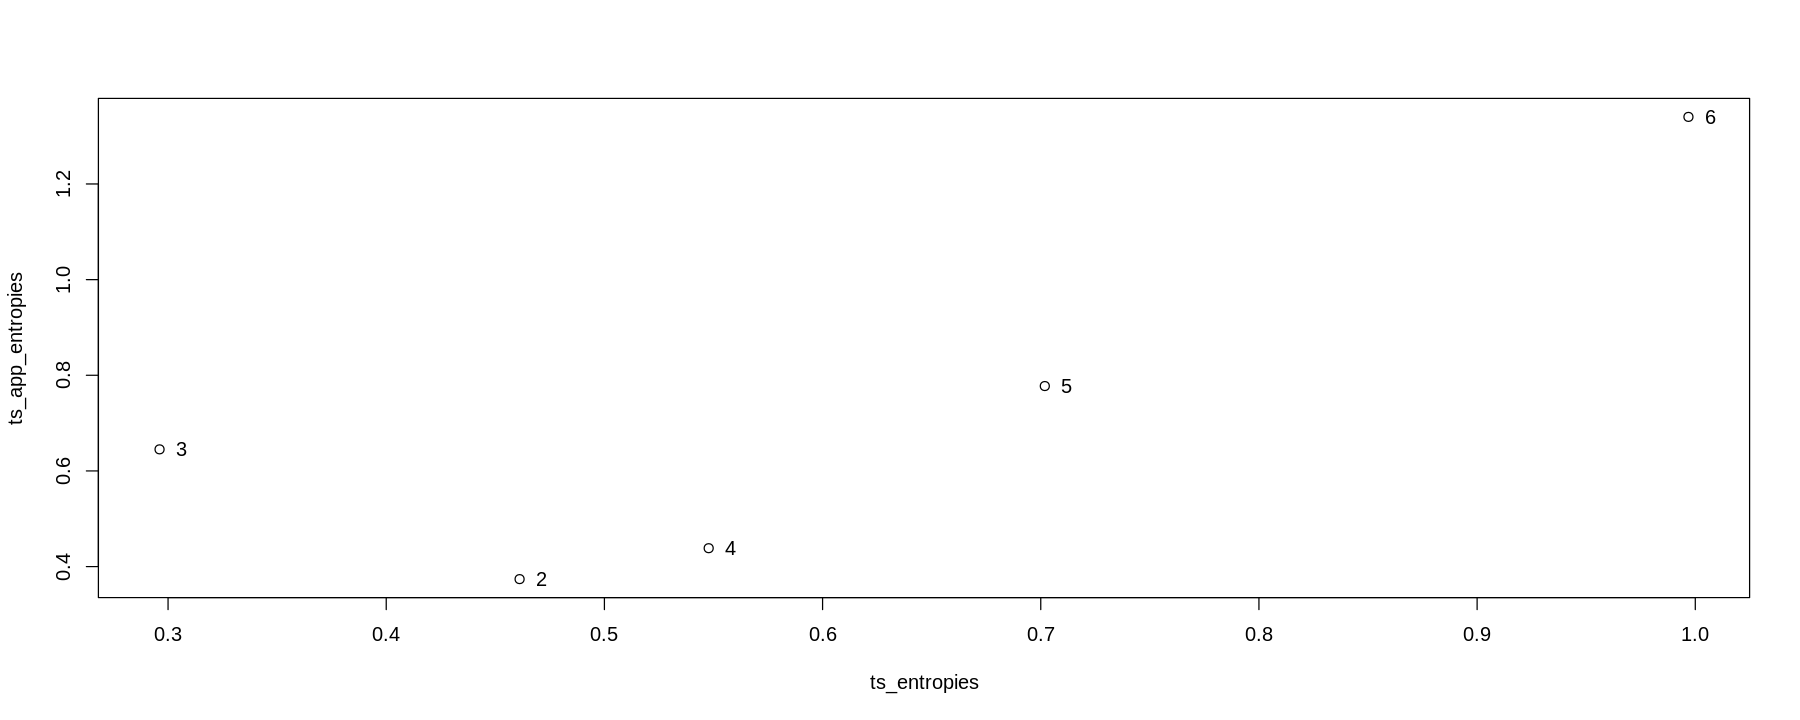

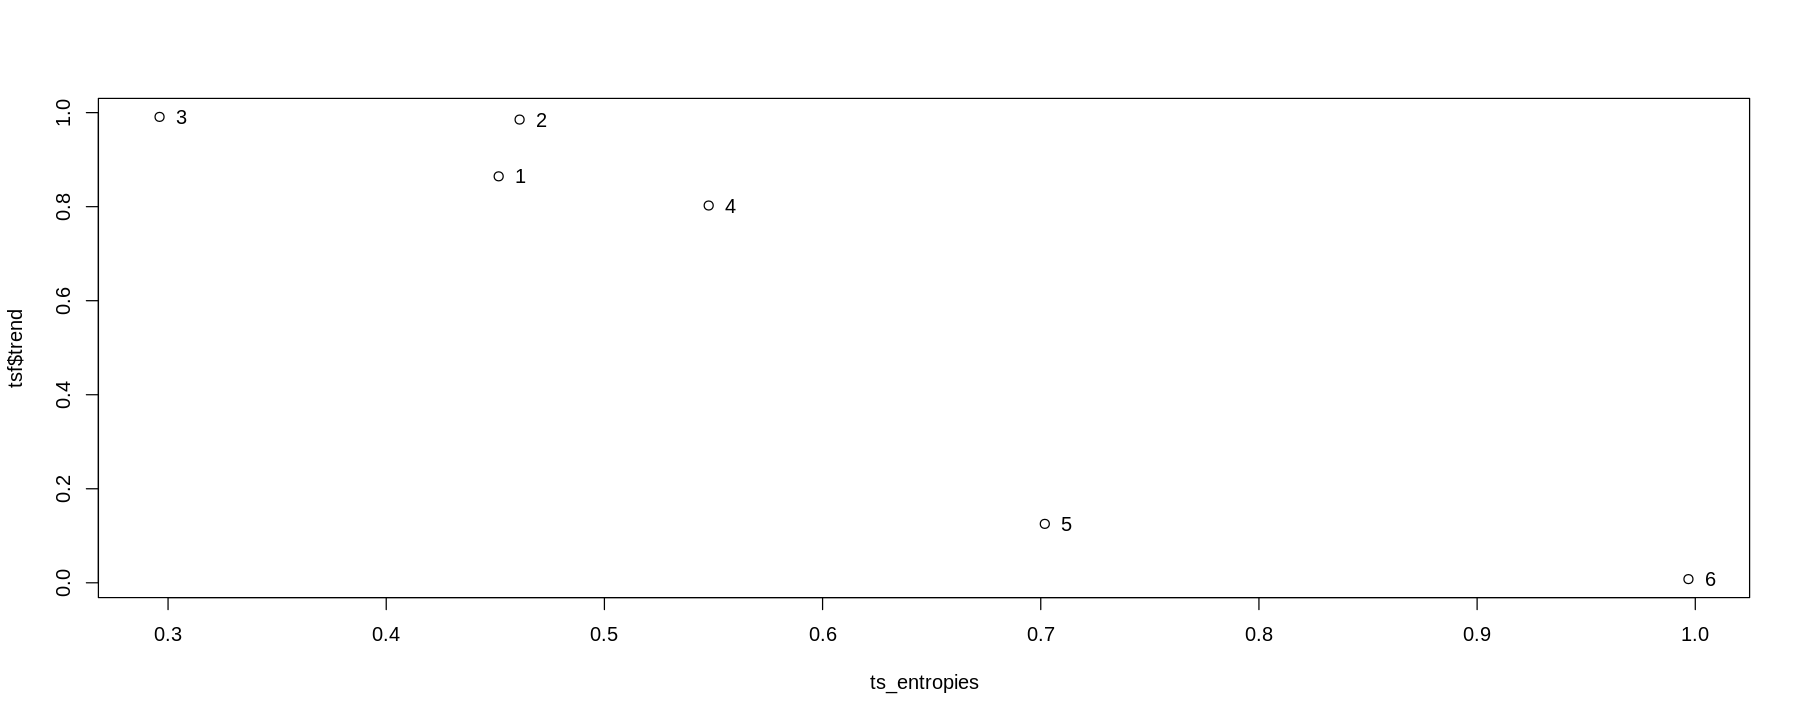

In [20]:
tsibble_list <- lapply(mylist, function(x) ts(x)%>%as_tsibble)
plts <- lapply(tsibble_list, autoplot);
grid.arrange(plts[[1]], plts[[2]], plts[[3]],plts[[4]], plts[[5]], plts[[6]], ncol=3, nrow=2)

pl1<- plot(ts_entropies, ts_app_entropies)
text(ts_entropies+0.01, ts_app_entropies, labels=c(1, 2, 3, 4, 5, 6))
pl2<- plot(ts_entropies, tsf$trend)
text(ts_entropies+0.01, tsf$trend, labels=c(1, 2, 3, 4, 5, 6))


Warning message:
“7 errors (1 unique) encountered for trend_model
[7] 0 (non-NA) cases
”


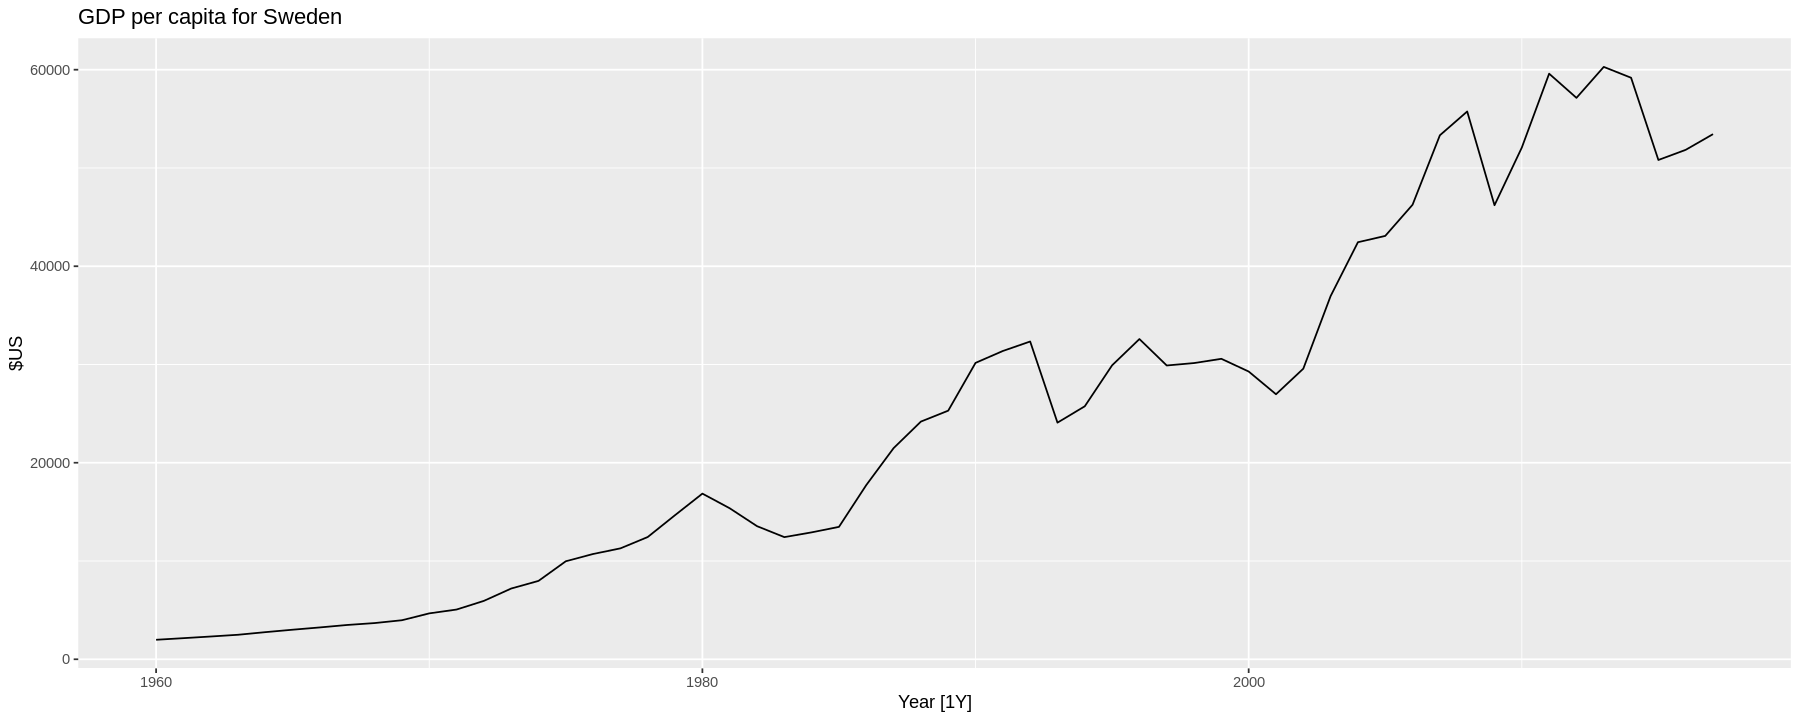

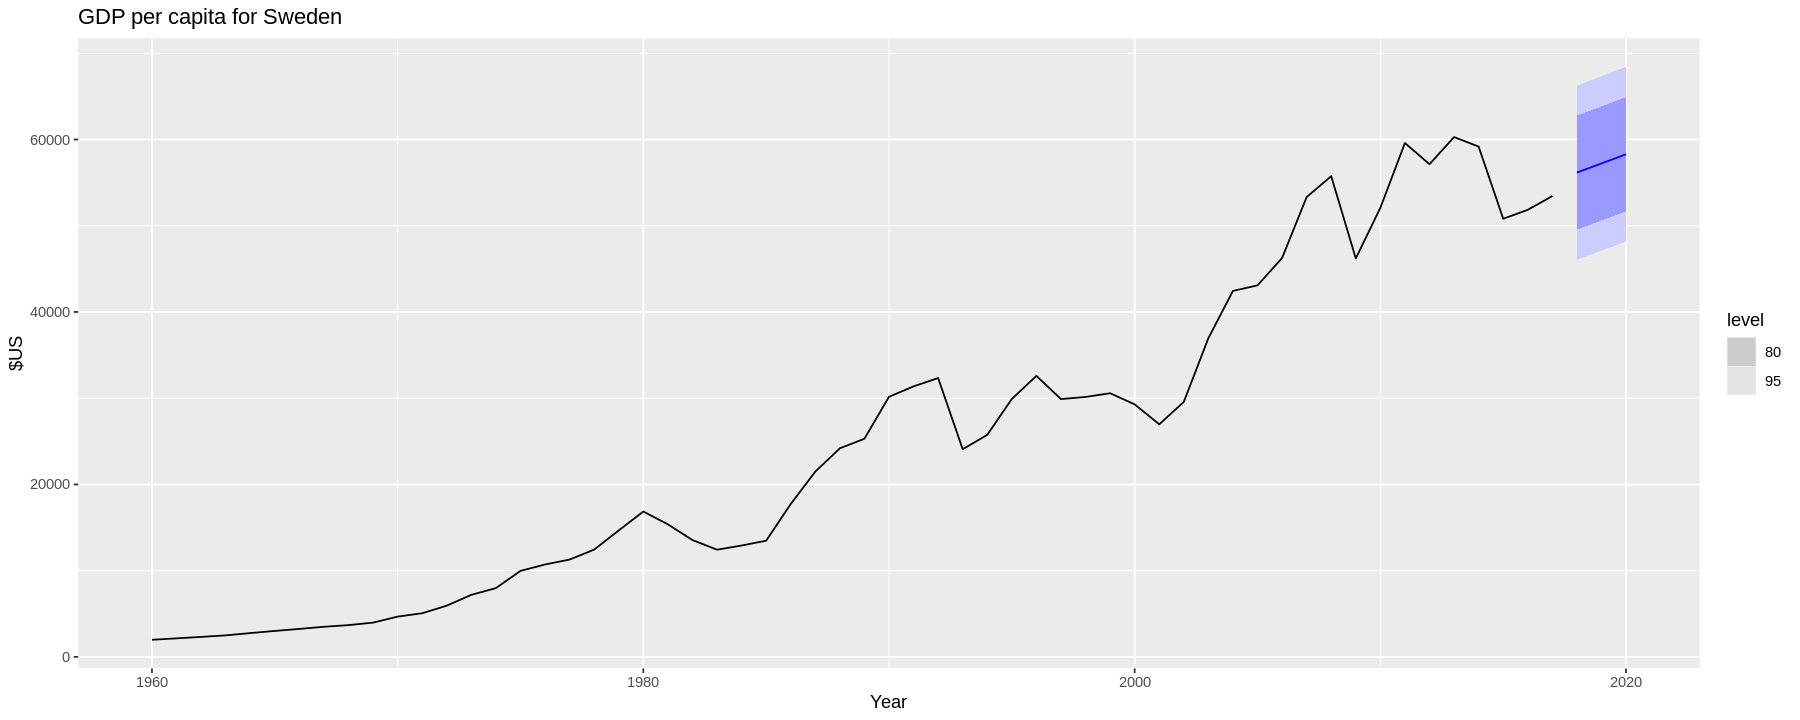

In [21]:
gdppc <- global_economy %>%
  mutate(GDP_per_capita = GDP / Population) %>%
  select(Year, Country, GDP, Population, GDP_per_capita)


gdppc %>%
  filter(Country == "Sweden") %>%
  autoplot(GDP_per_capita) +
  labs(title = "GDP per capita for Sweden", y = "$US")

fit <- gdppc %>%
  model(trend_model = TSLM(GDP_per_capita ~ trend()))

fc <- fit %>% forecast(h = "3 years")

fc %>%
  filter(Country == "Sweden") %>%
  autoplot(gdppc) +
  labs(title = "GDP per capita for Sweden", y = "$US")


Warning message:
“Removed 20 rows containing missing values (`geom_line()`).”


[1] 333.27369 302.27369 260.27369 340.27369 294.03677 263.03677 221.03677
 [8] 301.03677 263.92922 232.92922 190.92922 270.92922 238.54738 207.54738
[15] 165.54738 245.54738 216.18553 185.18553 143.18553 223.18553 356.21414
[22] 323.57996 298.53888 277.42827 258.82945 242.01483 226.55220 212.15992
[29] 198.64241 185.85722 173.69685 162.07776 150.93353 140.21029 129.86366
[36] 119.85654 110.15756 100.73989  91.58038  82.65890 357.10014 325.28214
[43] 300.96617 280.50302 262.48326 246.18608 231.18446 217.20096 204.04341
[50] 191.57228 179.68255 168.29286 157.33868 146.76786 136.53754 126.61201
[57] 116.96116 107.55931  98.38438  89.41723 216.54333 216.54333 216.54333
[64] 216.54333 216.54333 216.54333 216.54333 216.54333 216.54333 216.54333
[71] 216.54333 216.54333 216.54333 216.54333 216.54333 216.54333 216.54333
[78] 216.54333 216.54333 216.54333

Warning message:
“Removed 20 rows containing missing values (`geom_line()`).”


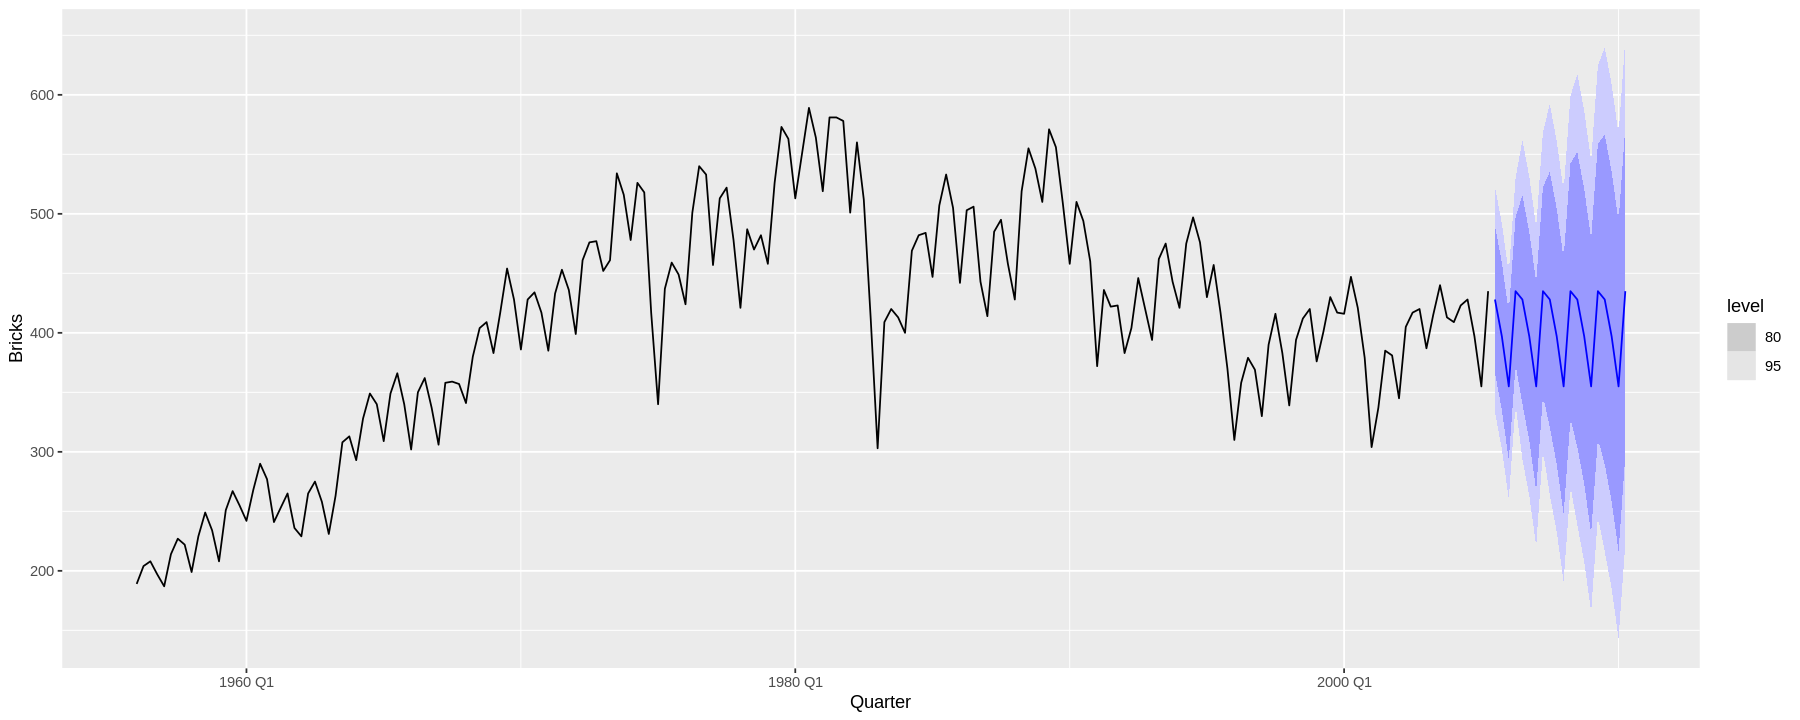

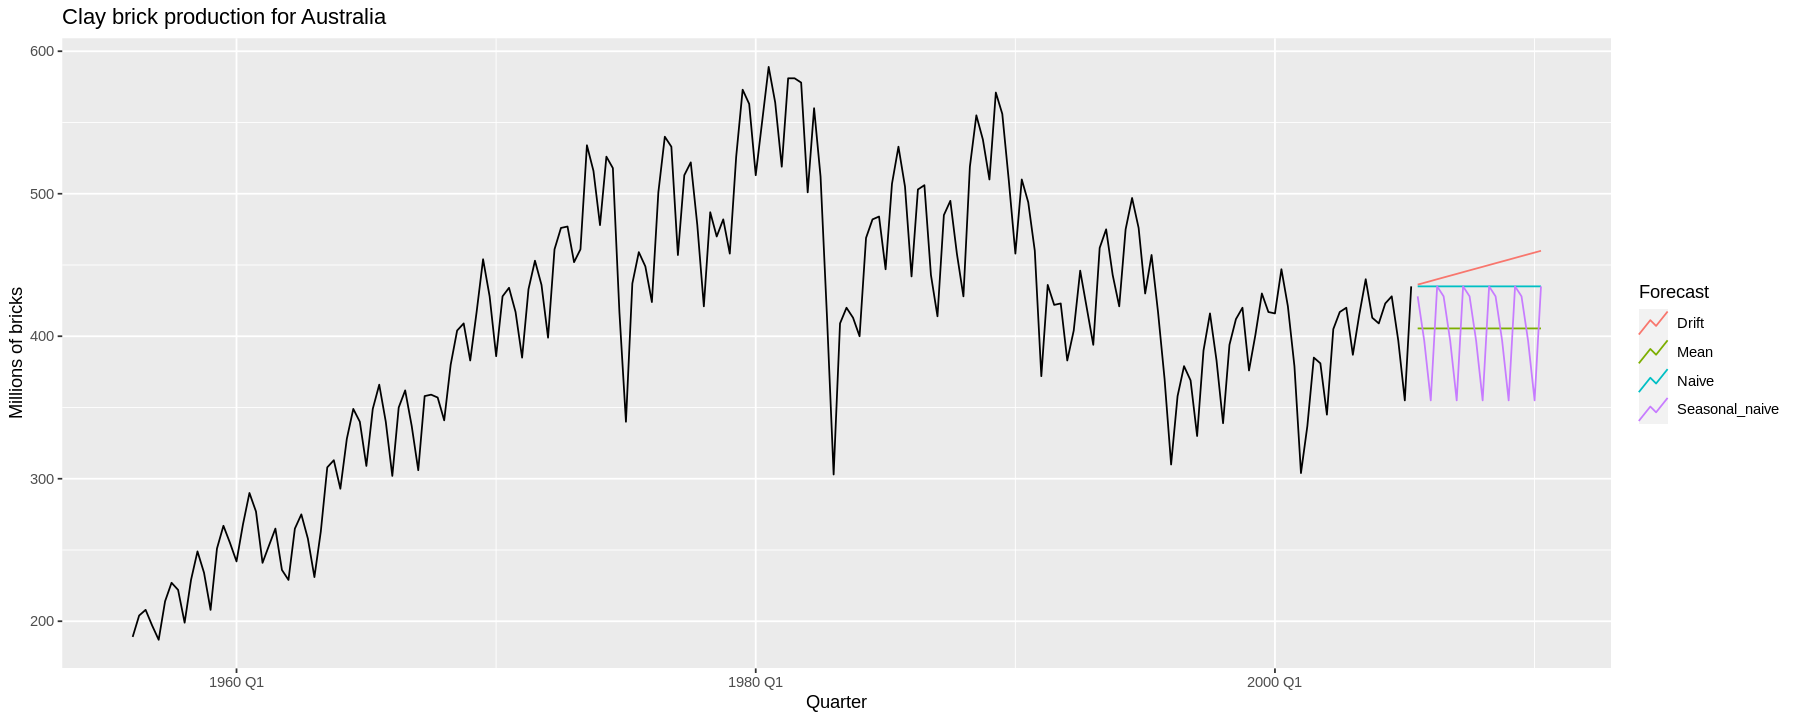

In [22]:
brick_fit <- aus_production %>%
  filter(!is.na(Bricks)) %>%
  model(
    Seasonal_naive = SNAIVE(Bricks),
    Naive = NAIVE(Bricks),
    Drift = RW(Bricks ~ drift()),
    Mean = MEAN(Bricks)
  )

brick_fc <- brick_fit %>%
  forecast(h = "5 years")

brick_fc %>%
  filter(.model == "Seasonal_naive") %>%
  autoplot(aus_production)

z <- brick_fc %>%
  hilo(level = 95) %>%
  pull(`95%`)
z$lower

brick_fc %>%
  autoplot(aus_production, level = NULL) +
  labs(
    title = "Clay brick production for Australia",
    y = "Millions of bricks"
  ) +
  guides(colour = guide_legend(title = "Forecast"))


In [23]:

train <- aus_production %>%
  filter(year(Quarter) >= 1992 & year(Quarter) < 2006)
test <- aus_production %>%
  filter(year(Quarter) >= 2006)

beer_fit <- train %>%
  model(
    Mean = MEAN(Beer),
    Naive = NAIVE(Beer),
    Seasonal_naive = SNAIVE(Beer),
    Drift = RW(Beer ~ drift())
  )
beer_fc <- beer_fit %>%
  forecast(h = 10)

accuracy(beer_fc, test)
accuracy(beer_fit)


.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Drift,Test,-65.20000,74.31689,66.43273,-16.2784190,16.529484,NaN,NaN,-0.1087247
Mean,Test,-16.21071,38.95122,34.46429,-4.5516488,8.330591,NaN,NaN,-0.1083210
Naive,Test,-61.30000,70.79619,63.10000,-15.3414028,15.708002,NaN,NaN,-0.1083210
Seasonal_naive,Test,-3.00000,13.58676,12.20000,-0.8771881,2.954052,NaN,NaN,-0.1588838


.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mean,Training,8.121418e-15,44.17630,35.91135,-0.9510944,7.995509,2.444228,2.562042,-0.1256697
Naive,Training,7.090909e-01,66.60207,55.43636,-0.8987351,12.266319,3.773156,3.862644,-0.2547521
Seasonal_naive,Training,-1.846154e+00,17.24261,14.69231,-0.4803931,3.401224,1.000000,1.000000,-0.3408329
Drift,Training,1.240308e-14,66.59830,55.50083,-1.0626439,12.290427,3.777543,3.862425,-0.2547521
